In [56]:
# import necesssary lib

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

import urllib
from urllib.request import Request
import json

In [57]:
# Get the list of countries
req = Request("https://api.covid19api.com/countries", headers={'User-Agent': 'Google'})

with urllib.request.urlopen(req) as url:
    # read string as json
    data = json.loads(url.read().decode())
    print(data)

[{'Country': 'Jordan', 'Slug': 'jordan', 'ISO2': 'JO'}, {'Country': 'Kyrgyzstan', 'Slug': 'kyrgyzstan', 'ISO2': 'KG'}, {'Country': 'Maldives', 'Slug': 'maldives', 'ISO2': 'MV'}, {'Country': 'Netherlands', 'Slug': 'netherlands', 'ISO2': 'NL'}, {'Country': 'Cook Islands', 'Slug': 'cook-islands', 'ISO2': 'CK'}, {'Country': 'Isle of Man', 'Slug': 'isle-of-man', 'ISO2': 'IM'}, {'Country': 'Kuwait', 'Slug': 'kuwait', 'ISO2': 'KW'}, {'Country': 'Republic of Kosovo', 'Slug': 'kosovo', 'ISO2': 'XK'}, {'Country': 'United States of America', 'Slug': 'united-states', 'ISO2': 'US'}, {'Country': 'Algeria', 'Slug': 'algeria', 'ISO2': 'DZ'}, {'Country': 'Burundi', 'Slug': 'burundi', 'ISO2': 'BI'}, {'Country': 'Sweden', 'Slug': 'sweden', 'ISO2': 'SE'}, {'Country': 'Ukraine', 'Slug': 'ukraine', 'ISO2': 'UA'}, {'Country': 'Belize', 'Slug': 'belize', 'ISO2': 'BZ'}, {'Country': 'Northern Mariana Islands', 'Slug': 'northern-mariana-islands', 'ISO2': 'MP'}, {'Country': 'Jamaica', 'Slug': 'jamaica', 'ISO2': '

Based on the API call above, we can see that the Slug for Singapore is 'singapore' 

In [58]:
# Get the number of confirmed, deaths and recovered cases in Singapore since 23 Jan 2020
req = Request("https://api.covid19api.com/total/dayone/country/singapore", headers={'User-Agent': 'Google'})

with urllib.request.urlopen(req) as url:
    # read string as json
    data = json.loads(url.read().decode())
    print(data)

[{'Country': 'Singapore', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 1, 'Deaths': 0, 'Recovered': 0, 'Active': 1, 'Date': '2020-01-23T00:00:00Z'}, {'Country': 'Singapore', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 3, 'Deaths': 0, 'Recovered': 0, 'Active': 3, 'Date': '2020-01-24T00:00:00Z'}, {'Country': 'Singapore', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 3, 'Deaths': 0, 'Recovered': 0, 'Active': 3, 'Date': '2020-01-25T00:00:00Z'}, {'Country': 'Singapore', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 4, 'Deaths': 0, 'Recovered': 0, 'Active': 4, 'Date': '2020-01-26T00:00:00Z'}, {'Country': 'Singapore', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 5, 'Deaths': 0, 'Recovered': 0, 'Active': 5, 'Date': '2020-01-

In [59]:
# See the number of days
print(len(data))

718


There are 718 days worth of data for Singapore

In [60]:
# Convert the list of JSON objects into dataframe
df = pd.json_normalize(data)

In [61]:
# take a quick look at the dataframe
df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Singapore,,,,,0,0,1,0,0,1,2020-01-23T00:00:00Z
1,Singapore,,,,,0,0,3,0,0,3,2020-01-24T00:00:00Z
2,Singapore,,,,,0,0,3,0,0,3,2020-01-25T00:00:00Z
3,Singapore,,,,,0,0,4,0,0,4,2020-01-26T00:00:00Z
4,Singapore,,,,,0,0,5,0,0,5,2020-01-27T00:00:00Z


In [62]:
# check the data types for each columns
df.dtypes

Country        object
CountryCode    object
Province       object
City           object
CityCode       object
Lat            object
Lon            object
Confirmed       int64
Deaths          int64
Recovered       int64
Active          int64
Date           object
dtype: object

The datatype for Date is wrong. It should be converted to Date data type instead of remaining as string

In [63]:
# convert the date column in string to date object
df['Date'] = df['Date'].apply(lambda x: datetime.fromisoformat(x[:-1]))

In [64]:
# drop unnecessary columns such as CountryCode, Province, City, CityCode, Lat, Lon
df.drop(columns=['CountryCode','Province','City','CityCode','Lat','Lon'], inplace=True)

In [65]:
# take a quick look at the dataframe
df.head()

,Country,Confirmed,Deaths,Recovered,Active,Date
0,Singapore,1,0,0,1,2020-01-23
1,Singapore,3,0,0,3,2020-01-24
2,Singapore,3,0,0,3,2020-01-25
3,Singapore,4,0,0,4,2020-01-26
4,Singapore,5,0,0,5,2020-01-27


<AxesSubplot:xlabel='Date'>

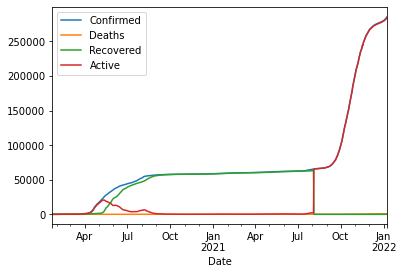

In [66]:
# plot a graph to show the number of cases of each status in Singapore over time
df.plot(x='Date',y=['Confirmed','Deaths','Recovered','Active'])

<AxesSubplot:xlabel='Date'>

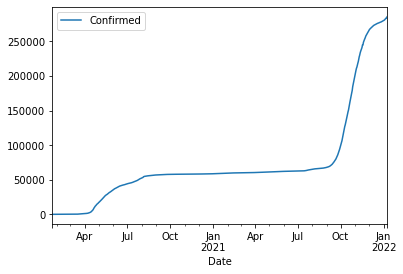

In [67]:
# plot a graph to show the number of confirmed cases in Singapore over time
df.plot(x='Date',y=['Confirmed'])

<AxesSubplot:xlabel='Date'>

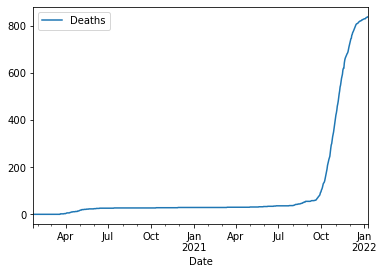

In [68]:
# plot a graph to show the number of confirmed cases in Singapore over time
df.plot(x='Date',y=['Deaths'])

Based on these charts, we can see a sudden drop in Recovered number while the Active number spiked up tremendously. This happens around August 2021. Let's take a look at the data

In [69]:
df[(df['Date'].dt.year == 2021) & (df['Date'].dt.month == 8)]

,Country,Confirmed,Deaths,Recovered,Active,Date
556,Singapore,65102,37,62957,2108,2021-08-01
557,Singapore,65213,38,63033,2142,2021-08-02
558,Singapore,65315,38,63252,2025,2021-08-03
559,Singapore,65410,39,63357,2014,2021-08-04
560,Singapore,65508,40,0,65468,2021-08-05
561,Singapore,65605,41,0,65564,2021-08-06
562,Singapore,65686,42,0,65644,2021-08-07
563,Singapore,65764,42,0,65722,2021-08-08
564,Singapore,65836,42,0,65614,2021-08-09
565,Singapore,65836,42,0,65794,2021-08-10


We can see that the Recovered Number drops to zero from 5 August 2021 onwards and the number seems to add to the Active number. It seems that from 5 August 2021, all recovered Covid19 patients are treated as Active